# K-Means

In [345]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# From https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py
# Really good, plots the dendrogram. Annoying this isn't a built in thing for scipy?
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Alternative calculation for k-medoid inertia - package calculation resulted in straight line
def calculate_inertia(distance_matrix, labels, medoids):
    inertia = 0
    for i, medoid in enumerate(medoids):
        cluster_points = np.where(labels == i)[0]
        inertia += np.sum(distance_matrix[cluster_points][:, medoid])
    return inertia

In [104]:
a=[2,2,8,6,7,7,1,4]
b=[10,5,3,8,5,3,2,9]
data = list(zip(a, b))

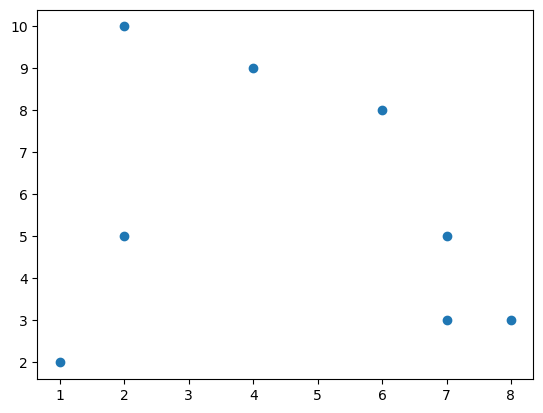

In [105]:
plt.scatter(a, b)

## Calculate Inertia (total SSE) of runs with different numbers of clusters
> Find optimal value of k

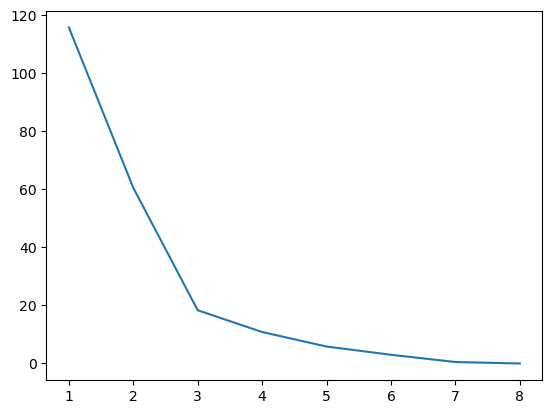

In [106]:
inertias = []

for i in range (1, len(data)+1):
    kmeans = KMeans(n_clusters=i, n_init=3)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1, len(data)+1), inertias)
# Selected k = 3

## Plot data and the centroid for each cluster
> Maybe find out how I can draw circles around clusters

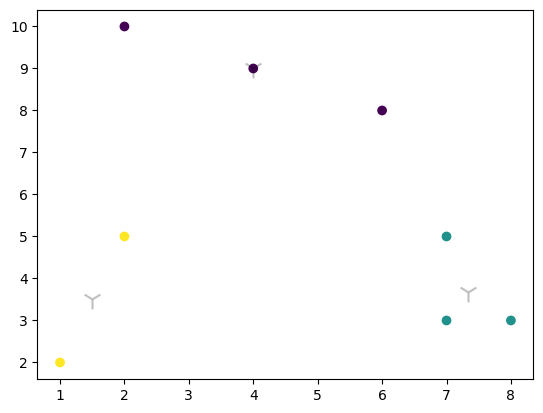

In [366]:
kmeans = KMeans(n_clusters=3, 
                init=np.array([[2, 10],[4, 8],[1, 2]]))
kmeans.fit(data)

plt.scatter(a, b, c=kmeans.labels_)
plt.scatter(*kmeans.cluster_centers_.transpose(), c='black', alpha=0.25, s=200, marker='1')

# Agglomerative Clustering

In [108]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [124]:
data = np.array(((0,2,6,7),
                     (2,0,4,8),
                     (6,4,0,5),
                     (7,8,5,0)))

# Since we've been given the distance matrix, we can say it's precomputed
completeAgg = AgglomerativeClustering(metric='precomputed', linkage='complete', compute_distances=True).fit(data)
singleAgg = AgglomerativeClustering(metric='precomputed', linkage='single', compute_distances=True).fit(data)

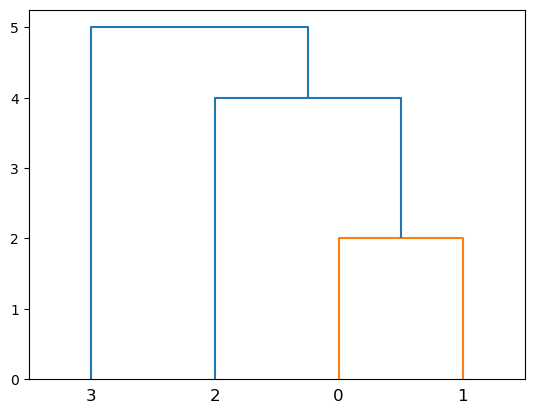

In [125]:
plot_dendrogram(singleAgg)

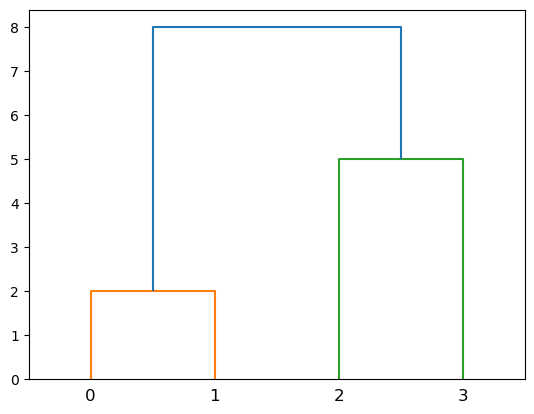

In [122]:
plot_dendrogram(completeAgg)

# Hierarchical Clustering

In [129]:
# Same Data as in first task just copying for here
data = list(zip(a,b,))
a, b, data

([2, 2, 8, 6, 7, 7, 1, 4],
 [10, 5, 3, 8, 5, 3, 2, 9],
 [(2, 10), (2, 5), (8, 3), (6, 8), (7, 5), (7, 3), (1, 2), (4, 9)])

## Single, Complete and Average Link Hierarchical

In [208]:
singleAgg = AgglomerativeClustering(linkage='single', compute_distances=True).fit(data)
completeAgg = AgglomerativeClustering(linkage='complete', compute_distances=True).fit(data)
averageAgg = AgglomerativeClustering(linkage='average', compute_distances=True).fit(data)
# Hell, let's throw in Ward
wardAgg = AgglomerativeClustering(linkage='ward', compute_distances=True).fit(data)
agglomeratives = [singleAgg, completeAgg, averageAgg, wardAgg]
agg_names = ['Single', 'Complete', 'Average', 'Ward']

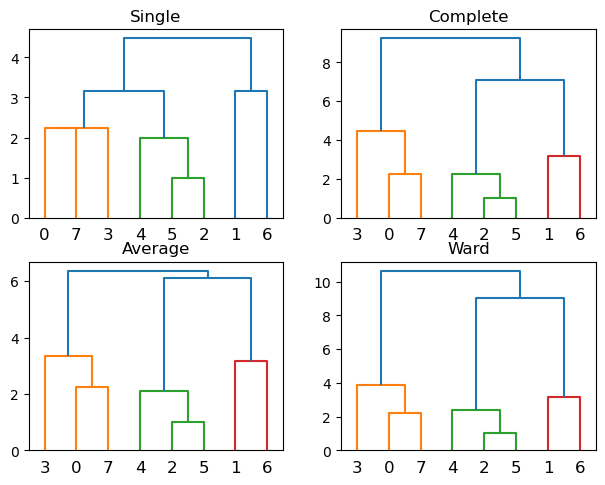

In [217]:
fig, ax = plt.subplots(2, 2)
fig.tight_layout()

for i, axis in enumerate(ax.flatten()):
    axis.set_title(agg_names[i])
    plot_dendrogram(agglomeratives[i], ax=axis)

# K-Medoids
> This was a bitch since the documentation isn't great in this package. Wanted to use scklearn-extra but it isn't compatible with python 3.12 yet

In [293]:
import kmedoids
from scipy.spatial.distance import pdist, squareform

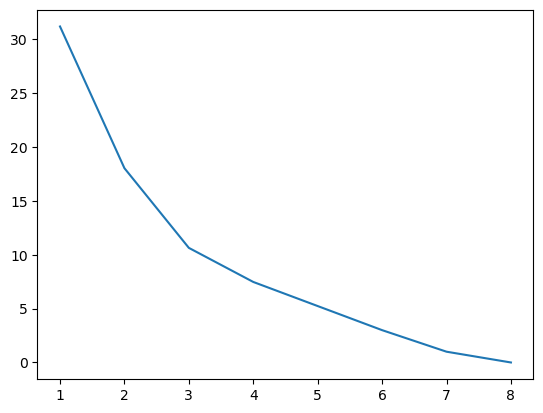

In [341]:
inertias = []

for i in range (1, len(data)+1):
    kmed = kmedoids.KMedoids(n_clusters=i, metric='euclidean')
    kmed.fit(np.array(data))
    inertias.append(calculate_inertia(squareform(pdist(data)), kmed.labels_, kmed.medoid_indices_))

plt.plot(range(1, len(data)+1), inertias)
# Selecting 3 again

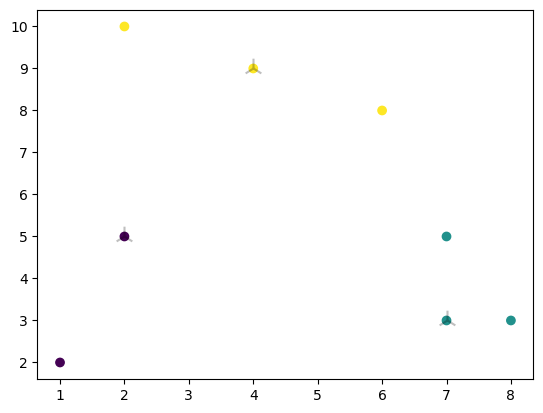

In [340]:
kmed = kmedoids.KMedoids(n_clusters=3, metric='euclidean', random_state=42)
kmed.fit(np.array(data))

plt.scatter(a,b, c=kmed.labels_)
plt.scatter(*np.asarray([x for i, x in enumerate(data) if i in kmed.medoid_indices_]).transpose(), 
            c='black', alpha=0.25, marker='2', s=200)